In [1]:
import pandas as pd 

In [4]:
teams=pd.read_csv(r"C:\Users\Aditi\Desktop\Excel Datasets\teams.csv")

In [5]:
teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [6]:
teams=teams[["team","country","year","athletes","age","prev_medals","medals"]]

In [7]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [13]:
#Drop alphabetical columns 
numeric_columns = teams.drop(columns=['team','country'])

In [15]:
#Calculate correlation
correlation = numeric_columns.corr()['medals']
correlation

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [16]:
#Since the correlation for athletes and prev_edals is high, these two variables can be used for making predictions on the 
#number of medals 

In [17]:
import seaborn as sns

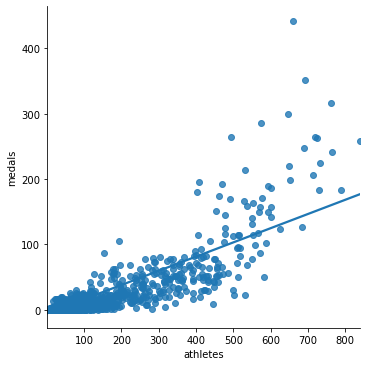

In [19]:
sns.lmplot(x="athletes",y="medals",data=teams,fit_reg=True,ci=False)

In [20]:
#There is a linear relationship between the number of athletes and number of medals

In [22]:
#sns.lmplot(x="medals",y="athletes",data=teams,fit_reg=True,ci=False)

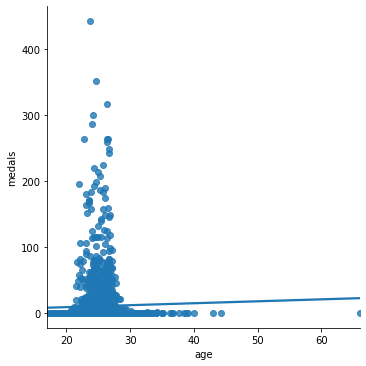

In [23]:
sns.lmplot(x="age",y="medals",data=teams,fit_reg=True,ci=None)

<AxesSubplot:ylabel='Frequency'>

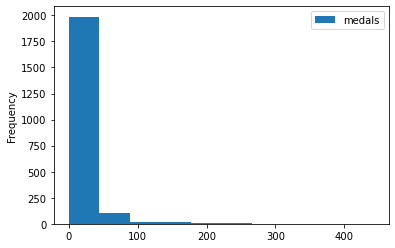

In [24]:
teams.plot.hist(y="medals")

In [25]:
#Almost 2000 countries have earned around 0 and 50 medals; very few countries have earned a lot of medals 

In [26]:
#Check for missing values 
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [27]:
#130 rows have missing values

In [29]:
#So we'll rop rows with missing data 
teams=teams.dropna()

In [30]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


In [31]:
#We take 2012 and 2016 data and put it in test data and the previous years in train dataset
train=teams[teams["year"]<2012].copy()
test=teams[teams["year"]>=2012].copy()

In [32]:
train.shape

(1609, 7)

In [33]:
test.shape

(405, 7)

In [34]:
1609+405

2014

In [35]:
#Usually people do a default 80:20 split

In [37]:
#Now to train the model
from sklearn.linear_model import LinearRegression
#Initialise linear regression class
reg=LinearRegression()

In [39]:
#The predictors (independent variables) are being initialised 
predictors=["athletes","prev_medals"]
target="medals"
#Essentially we train a linear regression model to use these two columns(athletes,prev_medals) to predict medals column

In [40]:
#Now we fit linear regression model 
reg.fit(train[predictors],train[target])
reg.fit(train[predictors],train["medals"])

LinearRegression()

In [41]:
predictions=reg.predict(test[predictors])
#We are using the predict method of our linear regression class and we are only passing in the predictors for test and not 
#the actual values and thats because we want algorithm to create predictions without knowing what the actual answers are
#So we are going to use this to generate predictions 

In [43]:
test["predictions"]=predictions

In [44]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [45]:
#If predictions was less than 0, we'll turn it into 0
test.loc[test["predictions"]<0, "predictions"]=0

In [46]:
test


,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


In [47]:
#We'll round the predictions because the number of medals has to be a whole number 
test["predictions"]=test["predictions"].round()

In [48]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


In [49]:
#Now we find mean absolute error
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(test["medals"],test["predictions"])

In [50]:
error

3.2987654320987656

In [51]:
#The error value 3.2987654320987656 means that on an average we were within 3.3 medals of how many medals of how many medals
#a team actually won in the olympics

In [52]:
#We'll dig a litte deeper into the dataset and figure out if that is a good error value or not 

In [53]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [54]:
#Error should be lesser than standard deviation

In [56]:
#We'll check how the predictions look team by team Eg: USA
test[test["team"]=="USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [58]:
test[test["team"]=="IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


In [61]:
errors=(test["medals"]-test["predictions"]).abs()

In [62]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [65]:
error_by_team=errors.groupby(test["team"]).mean()

In [66]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [69]:
medals_by_team=test["medals"].groupby(test["team"]).mean()

In [68]:
medals

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    0.0
Name: medals, Length: 204, dtype: float64

In [71]:
error_ratio=error_by_team/medals_by_team

In [72]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [73]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [76]:
import numpy as np

In [78]:
error_ratio=error_ratio[np.isfinite(error_ratio)]

In [79]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot:ylabel='Frequency'>

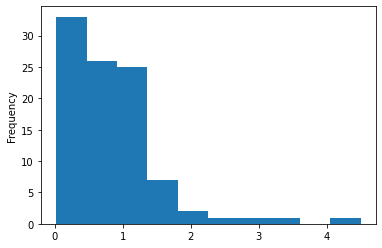

In [80]:
error_ratio.plot.hist()

In [81]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64